In [25]:
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.datasets import make_circles
from sklearn.metrics import accuracy_score, log_loss


dimensions de X: (2, 100)
dimensions de y: (1, 100)


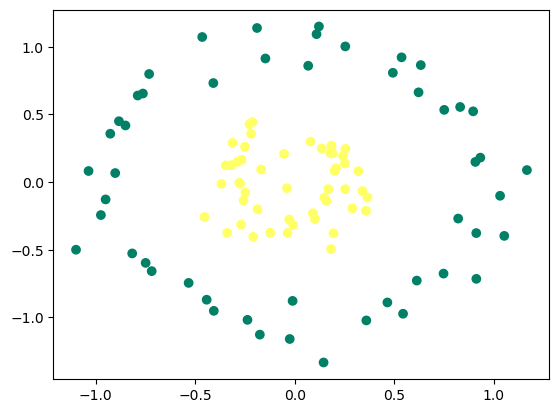

In [15]:
X, Y = make_circles (n_samples=100, noise=0.1, factor=0.3,random_state=0)
X=X.T
Y = Y.reshape((1,Y.shape[0]))
print('dimensions de X:', X.shape)
print('dimensions de y:', Y.shape)
plt.scatter (X[0,:], X[ 1,:], c=Y, cmap='summer')
plt.show()


In [16]:
def initialisation(n0,n1,n2):
    W1=np.random.randn(n1,n0)
    b1=np.random.randn(n1,1)
    W2=np.random.randn(n2,n1)
    b2=np.random.randn(n2,1)
    parametres = {
                'W1': W1,
                'b1': b1,
                'W2': W2,
                'b2': b2
                }
    return parametres
    

#W,b= initialisation(X)

In [17]:
def forward_propagation(X,parametres):
    W1=parametres["W1"]
    b1=parametres["b1"]
    W2=parametres["W2"]
    b2=parametres["b2"]
    
    Z1=W1.dot(X)+b1
    A1=1/(1+np.exp(-Z1))
    Z2=W2.dot(X)+b2
    A2=1/(1+np.exp(-Z2))

    Activations={
        "A1":A1,
        "A2":A2
    }
    return  Activations
         


In [54]:
A= model(X,W,b)
A.shape

(100, 1)

In [55]:
#def log_loss(Y,A):
    #return 1/len(Y) * np.sum(-Y * np.log(A)-(1-Y) * np.log(1-A))

In [18]:
def back_propagation(X,Y,Activations, parametres):
    A1 = Activations["A1"]
    A2 = Activations["A2"]
    W2 = parametres["W2"]
    m = Y.shape[1]
    #2 eme couche 
    dZ2 = A2-Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1/m * np.sum( dZ2 ,axis=1, keepdims= True)

    #1 eme couche
    dZ1 = np.dot(W2.T, dZ2)* A1 * (1-A1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1/m * np.sum( dZ1,axis=1, keepdims= True)

    grads={
        "dW1":dW1,
        "db1":db1,
        "dW2":dW2,
        "db2":db2,
        
    }
    
    return  grads
    

In [5]:
def update(grads,parametres ,learning_rate):
    W1 = parametres [ 'W1']
    b1= parametres ['b1']
    W2= parametres ['W2']
    b2 = parametres ['b2']
    
    dW1=grads["dW1"]
    db1=db1=grads["db1"]
    dW2=grads["dW2"]
    db2= grads["db2"]

    W1 = W1 - learning_rate * dW1
    b1 = b1 - learning_rate * db1
    W2 = W2 - learning_rate * dW2
    b2 = b2 - learning_rate * db2
   parametres={
        "W1": W1,
        "b1":b1,
        "W2": W2,
        "b2": b2
        }

    return parametres
    


In [19]:
def predict(X , parametres):
    
    Activations=forward_propagation(X,parametres)
    A2=Activations["A2"]
    return A2>=0.5
    


In [28]:
def neural_network(X_train , Y_train,n1, learning_rate=0.1, n_iter=100):

    n0= X_train.shape[0]
    n2=Y_train.shape[0]
    parametres = initialisation(n0,n1,n2)
    
    train_loss= []
    train_acc=[]
    for i in range(n_iter):
        Activations =forward_propagation(X,parametres)
        #loss.append(log_loss(A,Y)) #loss = log_loss(A,Y)
        
        grads= back_propagation(X_train,Y_train, Activations, parametres)
        parametres= update(grads,parametres,learning_rate)


        if i %10 == 0:
            # Train
            train_loss.append(log_loss (Y_train, Activations["A2"]))
            y_pred = predict(X_train, parametres)
            current_accuracy = accuracy_score (Y_train.flatten(),y_pred.flatten())
            train_acc.append(current_accuracy)
                                               
    plt.figure(figsize=(14, 4))
    plt.subplot(1, 2, 1)
    plt.plot(train_loss, label='train loss')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(train_acc, label='train-acc')
    plt.legend()
    plt.show()
                                               
    return parametres                                          
                                               
                                               






    
    

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:2956: UserWarning: The y_pred values do not sum to one. Make sure to pass probabilities.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:2956: UserWarning: The y_pred values do not sum to one. Make sure to pass probabilities.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:2956: UserWarning: The y_pred values do not sum to one. Make sure to pass probabilities.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:2956: UserWarning: The y_pred values do not sum to one. Make sure to pass probabilities.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:2956: UserWarning: The y_pred values do not sum to one. Make sure to pass probabilities.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:29

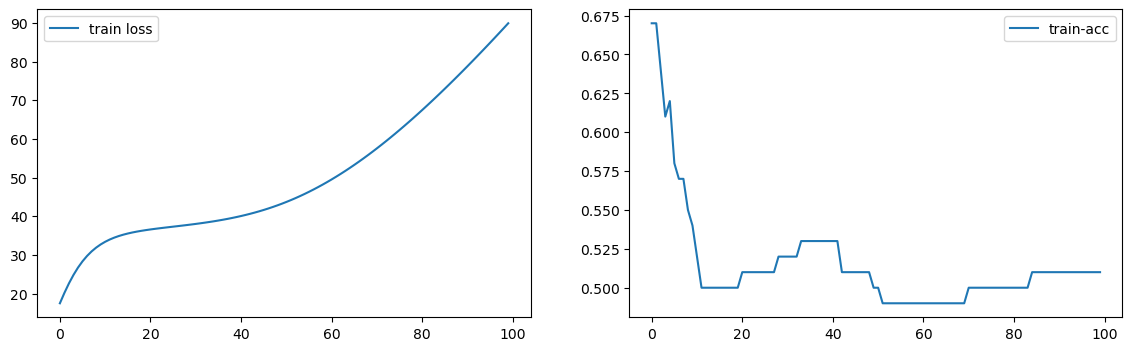

In [29]:
parametres = neural_network(X, Y, n1=2, learning_rate=0.1,n_iter=1000)

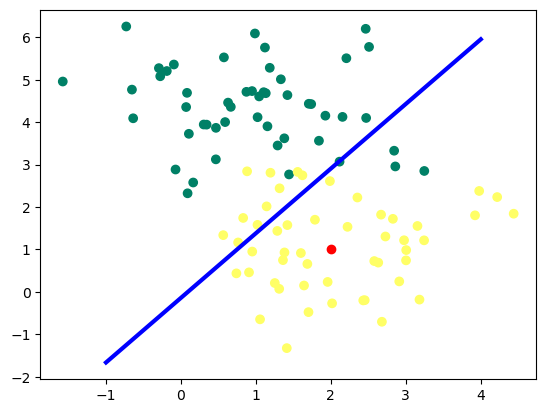

In [76]:
new_plante= np.array([2,1])
x0=np.linspace(-1,4,100)
x1= (-W[0]*x0-b) / W[1]
plt.scatter(new_plante[0],new_plante[1], c="r")

plt.scatter(X[:,0],X[:,1], c=Y,cmap="summer")
plt.plot(x0, x1, c="b", lw=3)
plt.show()


In [74]:
print(predict(new_plante ,W ,b))

[0.85915137]
[ True]
